### Part 1: Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras import backend as K
import matplotlib.pyplot as plt 

Using TensorFlow backend.


### Part 2: Import and Visual the dataset. MNIST: Handwritten Digits

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

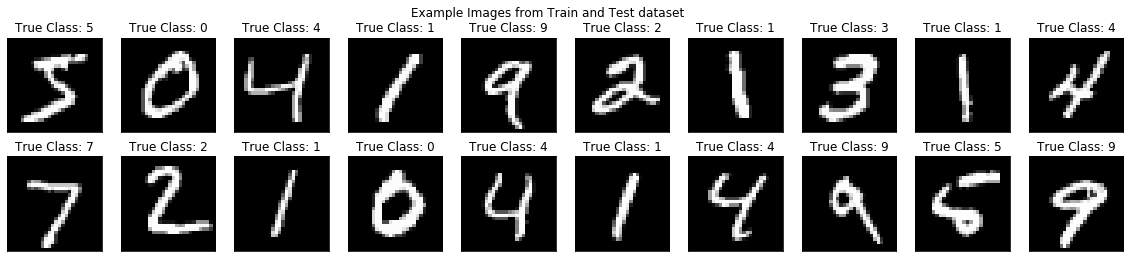

In [3]:
n=10
plt.figure(figsize=(20, 4))
plt.suptitle("Example Images from Train and Test dataset")
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(train_x[i].reshape(28, 28))
    plt.title("True Class: {}".format(train_y[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.title("True Class: {}".format(test_y[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
plt.show()

### Part 3: Normalizing data to be between 0 and 1

In [4]:
train_x = train_x.astype('float32')/255.
test_x = test_x.astype('float32')/255.
train_x = np.reshape(train_x, (len(train_x), 28, 28, 1))
test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))
print("Size and dimensions of Train set: {} Test set: {}".format(train_x.shape,test_x.shape))
print("Example of an element from Train set: {}".format(train_x[0]))
print("Label of same element: {}".format(train_y[0]))

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)
print(train_y[0])

Size and dimensions of Train set: (60000, 28, 28, 1) Test set: (10000, 28, 28, 1)
Example of an element from Train set: [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0. 

### Part 4: Creating the Model. Making Convolutional Neural Network for MNIST

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

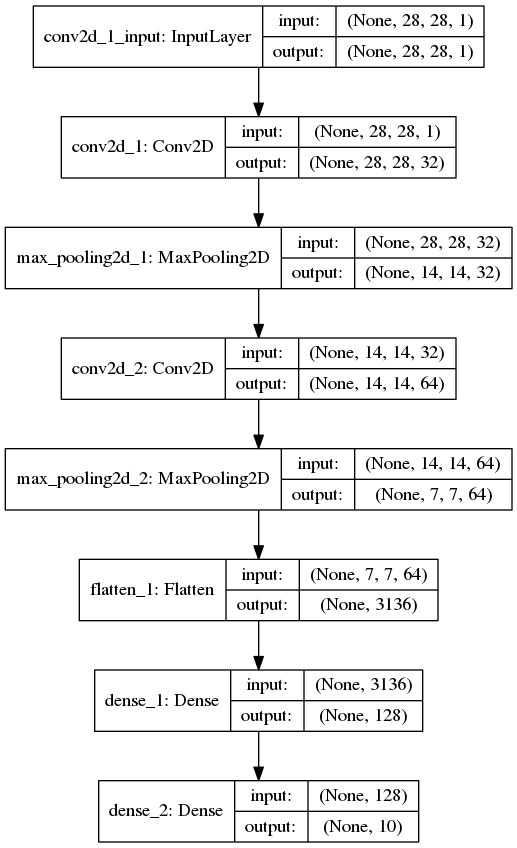

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

### Part 5: Let's train the model.

In [6]:
history = model.fit(train_x, train_y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3276 - accuracy: 0.9053 - val_loss: 0.1041 - val_accuracy: 0.9700
Epoch 2/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0756 - accuracy: 0.9768 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 3/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 4/10
48000/48000 [==============================] - 74s 2ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0461 - val_accuracy: 0.9872
Epoch 5/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 6/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 7/10
48000/48000 [==============================] - 65s 1ms/st

### Part 6: Let's visualize the accuracy and loss of epochs. Let's also evaluate on test dataset

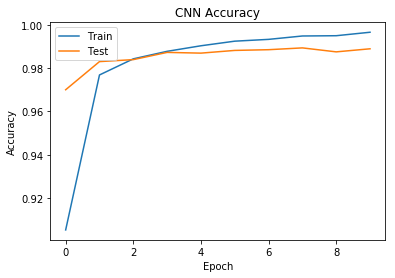

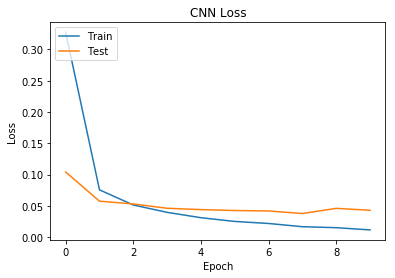

10000/10000 [==============================] - 5s 465us/step
Test Loss: 0.030656764822671538 and Test Accuracy: 0.9891999959945679


In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Loss: {} and Test Accuracy: {}".format(test_loss,test_accuracy))

y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

### Part 7: Let's visualize the test set one more time now with predicted labels.

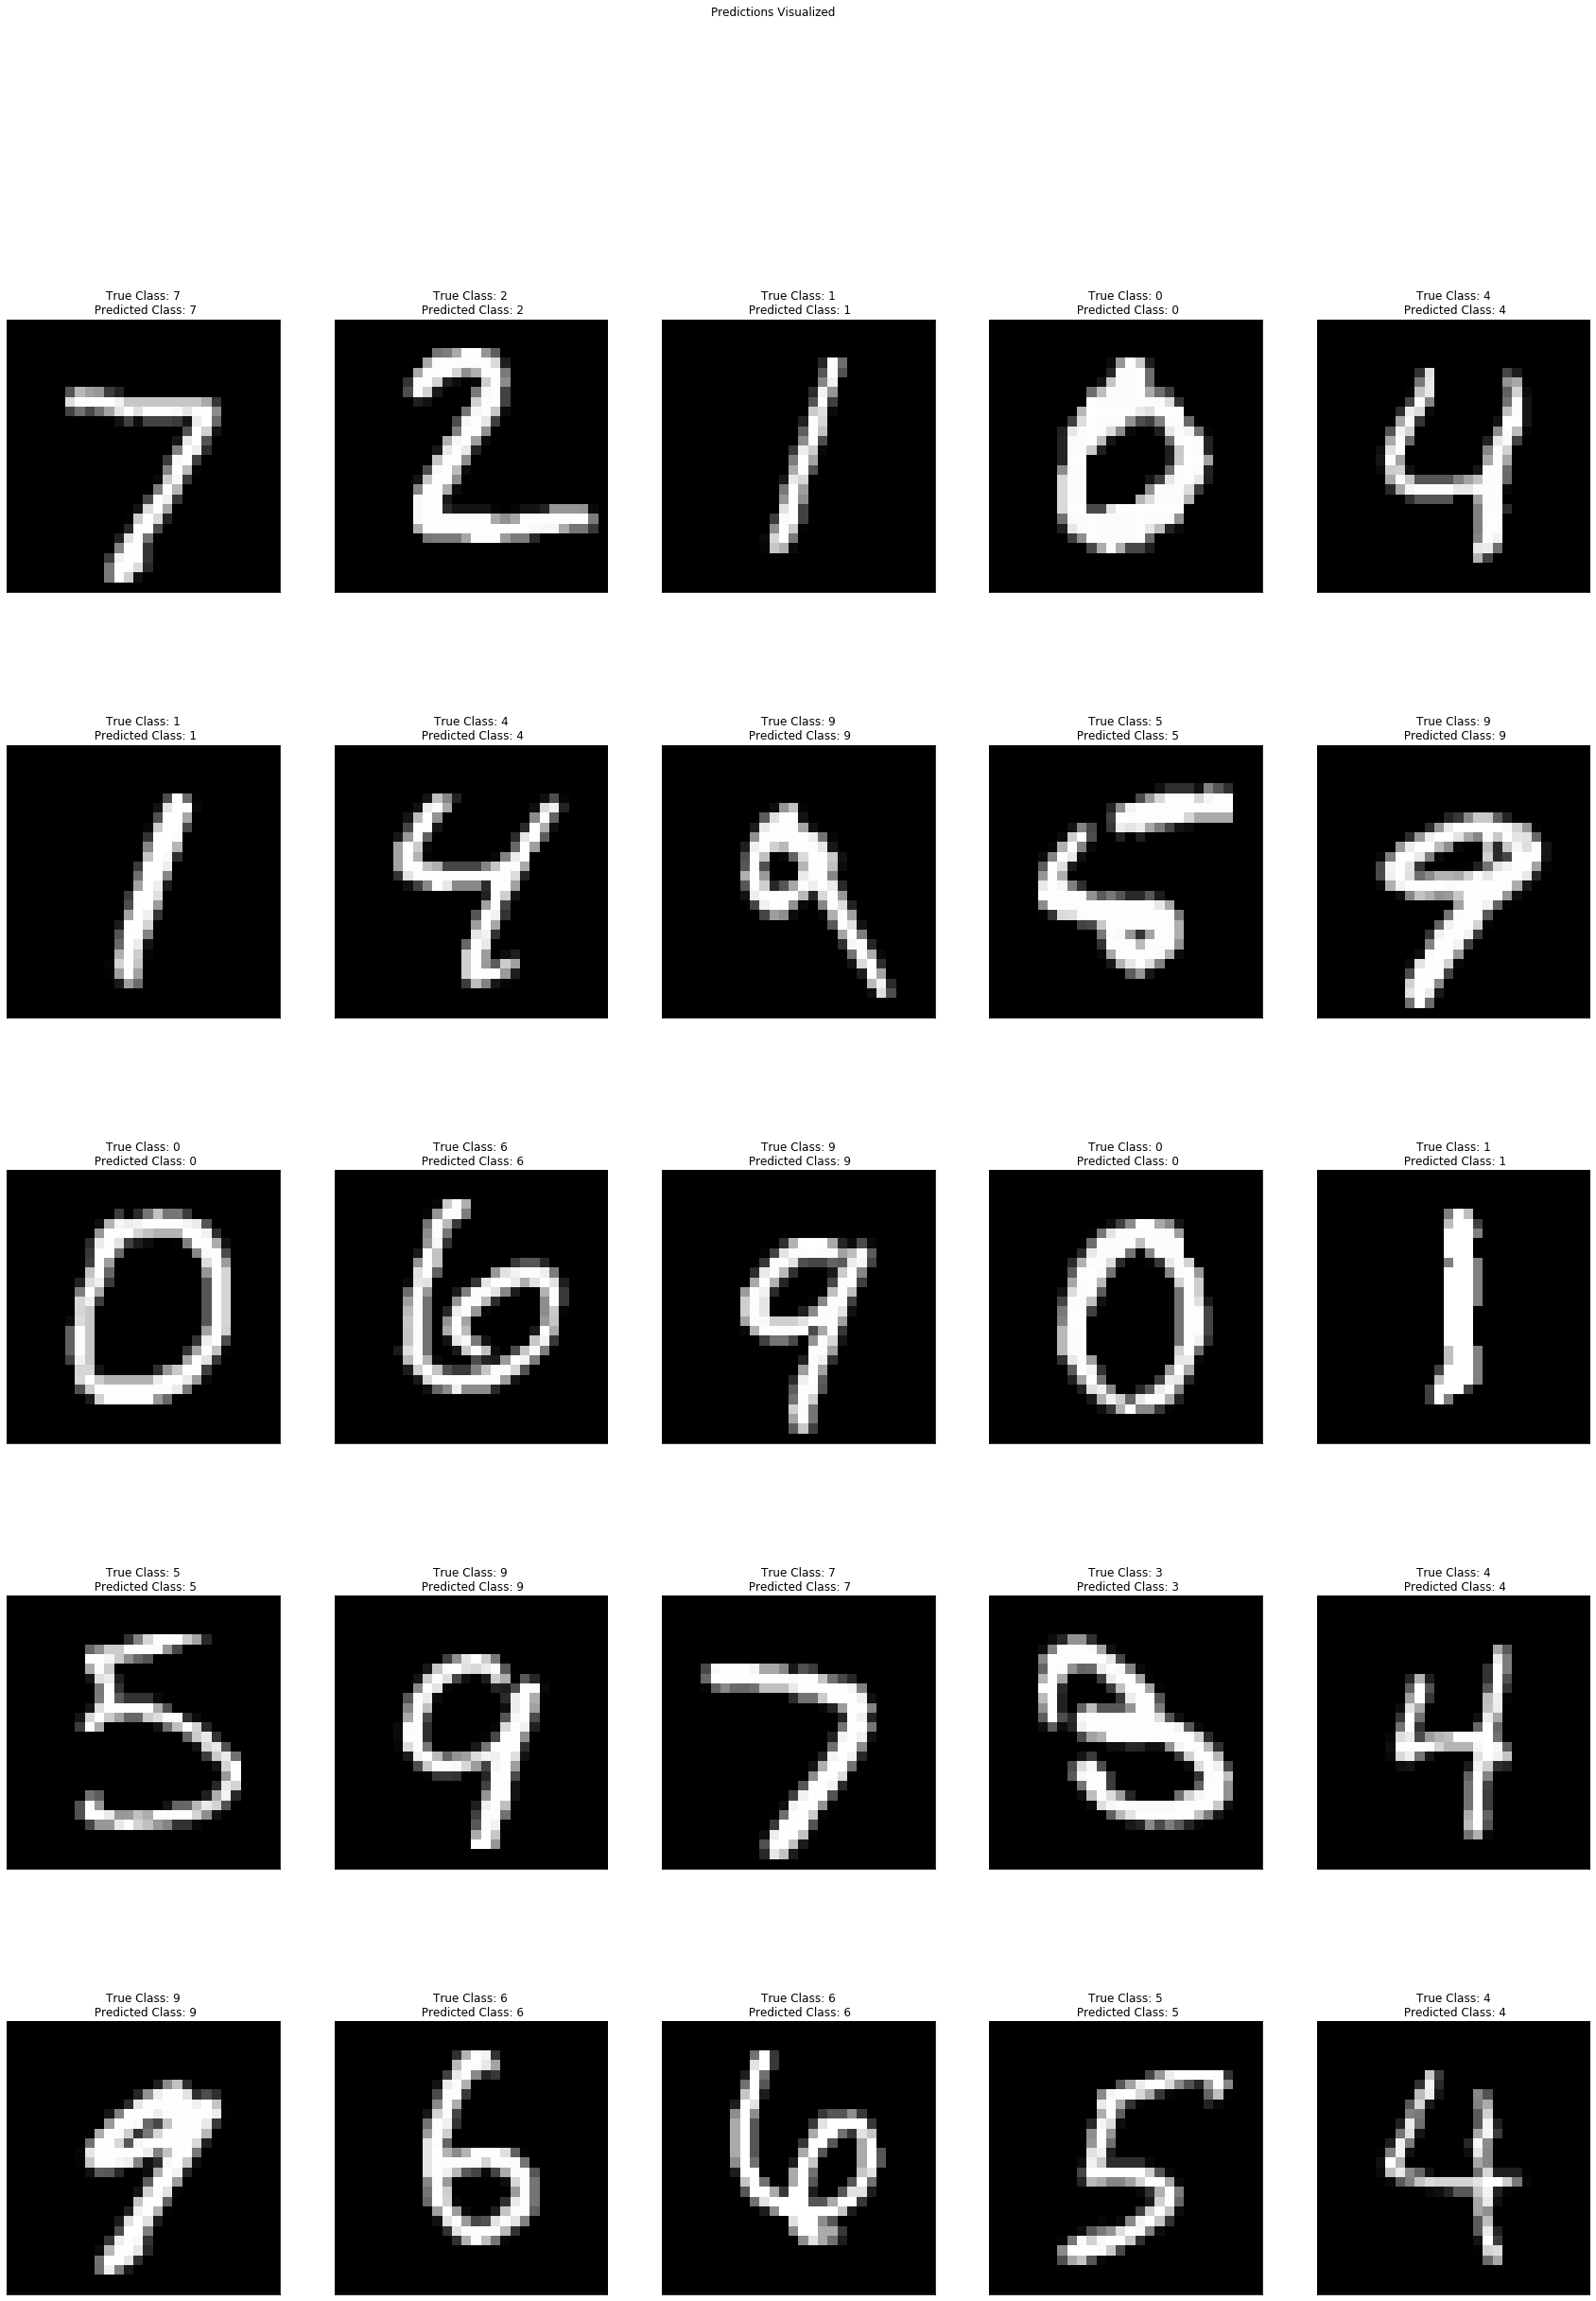

In [15]:
n=10
plt.figure(figsize=(30, 40))
plt.suptitle("Predictions Visualized")
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.title("True Class: {}\n Predicted Class: {}".format(test_y[i],y_pred[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()